# Introduction

**Basic Description of the Dataset and its Design**

The dataset in our study was derived from the Anki Medical Curriculum flashcards, a comprehensice collection curated and continually updated by medical students. Thes flashcards cover the full breadth of the medcial curriculum, encompassing subjects suche as anatomy, physiology, pathology and pharmacology. Each flashcard typically includes summaries to facilitate the learning and retention of key medical concepts. To create the dataset, the content was extracted from these flashcards, excluding those containing images.
Then, OpenAI's GPT 3.5- turbo was employed to transfrom the flashcard content into coherent, contextually relevant question-answer pairs.

The dataset consists of over 30,000 questions, each accompanied by a corresponding segment of text serving as its answer. Notably, these answers lack any additional context.

**Challenge in having only Question and Answers pairs without context**

A significant challenge of this dataset is the lack of extended context beyond the question and answer pairs. Typically, one of the most straightforward and simplet ways to train and fine-tune a question-answering model involves providing a context along with the question and answer.
Context aids the model in retriving the correct answer by grounding the question relevant information. However, the concise nature of the flashcard means that each pair must stand alone without additional explanatory medical concepts or see the connections between different pieces of information. Additionally, without context, it can be challenging to ensure that the questions are interpreted correctly and that the answers are sufficiently informative

**Our Work**

In tis notebook, we'll delve into a exploratory data analysis of the provided dataset. Our aim is to examine the data's structure and characteristics. Through this exploration, we seek to gain profound insights into both the dataset itself and the task at hand. Ultimately, our goal is to pinpoint a model that effectively addresses the complexity of this challenge

## Import and install

In [1]:
!pip install -q python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00


In [3]:
pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.6 MB/s eta 0:00:00


In [4]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using ca

In [5]:
import string
from datasets import load_dataset
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import altair as alt
from gensim.models import Word2Vec
from google.colab import drive
import os
import csv
import numpy as np
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk import FreqDist
from Bio import Entrez
from keybert import KeyBERT
import pyterrier as pt
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import subprocess

## setup

In [6]:
drive.mount('/content/drive')
os.chdir(f'/content/drive/MyDrive/Colab Notebooks/NLP/Assignment/datasets')
os.getcwd()
HUGGINGFACE = False
SAVE_DATASET = True
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
kw_model = KeyBERT()

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Utils

The function **preprocess_document** is designed to process a given document, performing various optional text preprocessing steps based on the specified parameters. These parameters include:

* isSorted: If set to True, the function sorts the processed document alphabetically.
* isSet: If set to True, the function converts the processed document into a set, removing any duplicate elements.
* noStopWords: If set to True, the function removes common English stopwords from the processed document.
* lemmatization: If set to True, the function lemmatizes the words in the processed document using WordNet.

The function begins by removing punctuation from the document using a regular expression. Then, depending on the parameters provided, it applies additional processing steps accordingly. Finally, it returns the processed document.

In [7]:
def preprocess_document(document,noPunctuation=False ,isSorted=False, isSet=False, noStopWords=False, lemmatization=False):
  newDocument = document
  if noPunctuation==True:
    regex = '[' + string.punctuation + ']'
    newDocument = [re.sub(regex,'',item) for item in newDocument]
  if isSet==True:
    newDocument = set(newDocument)
  if noStopWords==True:
    newDocument =  [w for w in newDocument if w not in stopwords.words('english')]
  if isSorted==True:
    newDocument = sorted(newDocument)
  if lemmatization==True:
    lemmatizer = WordNetLemmatizer()
    newDocument = [lemmatizer.lemmatize(w) for w in newDocument]
  return newDocument


The function **create_global_vocabolary** operates on a DataFrame df containing document vocabularies. It aims to create a global vocabulary by aggregating all unique words from the document vocabularies within the DataFrame. The function offers optional parameters for further processing:

* isSorted: When set to True, the function sorts the global vocabulary alphabetically.
* isSet: If set to True, the function converts the global vocabulary into a set to remove any duplicate words.
* noStopWords: If set to True, the function removes common English stopwords from the global vocabulary.

The function iterates over each document vocabulary in the DataFrame, extending the global vocabulary with all unique words encountered. Depending on the specified parameters, it conducts additional processing such as sorting, converting to a set, and removing stopwords. Finally, it returns the resulting global vocabulary.

In [8]:
def create_global_vocabolary(df,isSorted=False, isSet=False, noStopWords=False):
  global_voc = []
  for document_voc in df:
    global_voc.extend(word for word in document_voc)
  if isSet==True:
    global_voc = set(global_voc)
  if noStopWords==True:
    global_voc =  [w for w in global_voc if w not in stopwords.words('english')]
  if isSorted==True:
    global_voc = sorted(global_voc)
  return global_voc


This function, **nGrams**, generates and visualizes n-grams from a given document. It takes the document as input along with optional parameters for specifying the size of the n-grams and the number of most common n-grams to display. After generating the n-grams and counting their occurrences, it plots the frequency distribution of the top N most common n-grams. This visualization aids in understanding the distribution of word combinations in the document, helping to identify frequently occurring patterns.

In [9]:
def nGrams(document,size=2,NmostCommon=10):
  # Generate n-grams from the list of words
  ngram_list = list(ngrams(document, size))
  # Count the occurrences of each n-gram
  ngram_counter = FreqDist(ngram_list)
  # Get the top N most common n-grams
  most_common_ngrams = ngram_counter.most_common(NmostCommon)
  # Separate n-grams and counts for plotting
  ngram_tuples, counts = zip(*most_common_ngrams)  # Change the variable name here
  # Convert n-gram tuples to strings for plotting
  ngram_strings = [" ".join(ngram) for ngram in ngram_tuples]
  # Plot the n-gram frequency distribution
  plt.figure(figsize=(10, 5), dpi=125)
  plt.bar(ngram_strings, counts)
  plt.xlabel("N-grams")
  plt.ylabel("Frequency")
  plt.title("Frequency Distribution of Top {} {}-grams after removing punctuation and stopwords".format(NmostCommon, size))
  plt.xticks(rotation=45)
  plt.show()


# Dataset loading

We initiate dataset download with this code snippet, offering flexibility in data retrieval. Depending on the value of the HUGGINGFACE flag, the script fetches the dataset from Hugging Face's repository or directly loads it from a CSV file stored on Google Drive. This versatile approach simplifies the process of acquiring the necessary data for analysis or modeling tasks.

## Huggining face loading

In [10]:
if HUGGINGFACE == True:
  raw_datasets =  load_dataset("medalpaca/medical_meadow_medical_flashcards", download_mode="force_redownload")
  raw_dataframe = raw_datasets['train'].to_pandas()
  raw_dataframe.to_csv('MedFlashCards.csv', index=False)


## Drive loading

In [11]:
if not HUGGINGFACE:
  file_dataframe = pd.read_csv('MedFlashCards.csv')
  print(type(file_dataframe))
  print(file_dataframe.head())

<class 'pandas.core.frame.DataFrame'>
                                               input  \
0  What is the relationship between very low Mg2+...   
1  What leads to genitourinary syndrome of menopa...   
2  What does low REM sleep latency and experienci...   
3  What are some possible causes of low PTH and h...   
4  How does the level of anti-müllerian hormone r...   

                                              output  \
0  Very low Mg2+ levels correspond to low PTH lev...   
1  Low estradiol production leads to genitourinar...   
2  Low REM sleep latency and experiencing halluci...   
3  PTH-independent hypercalcemia, which can be ca...   
4  The level of anti-müllerian hormone is directl...   

                       instruction  
0  Answer this question truthfully  
1  Answer this question truthfully  
2  Answer this question truthfully  
3  Answer this question truthfully  
4  Answer this question truthfully  


# Dataset description, Data preprocessing and Feature extraction

In the upcoming lines of code, we'll conduct data preprocessing tasks and explore the dataset to improve its quality and usability. This preprocessing is vital for facilitating data visualization, exploration, and subsequent analysis.

The dataset is organized into a dataframe with columns representing 'question' and 'answer' pairs. For each pair, we'll augment the dataframe with additional columns describing key features such as length and the preprocessed text after removing punctuation, stopwords, and applying lemmatization.

These preprocessing steps enable us to analyze the data more effectively, uncovering insights about its structure and regularities. Through statistical analysis, we can gain a deeper understanding of the dataset, paving the way for more informed analysis and decision-making.

## Number of questions and answers

In the upcoming code lines, our primary focus lies in comprehending the dataset's composition by examing thr quantity of questions and answers.
We will then proceed to detect and eliminat any empty or invalid entries within the dataset. This meticulous process ensures the dataset's intefrity and enhances its quality for subsequent analyses

In [12]:
dataset_length = len(file_dataframe)
number_empty_entries = file_dataframe.isnull().sum()
total_number_of_empty_entries = number_empty_entries.sum()
file_dataframe.dropna(inplace=True)
dataset_length_no_empty_entries = len(file_dataframe)
number_of_questions = len(file_dataframe['input'])
number_of_answers = len(file_dataframe['output'])

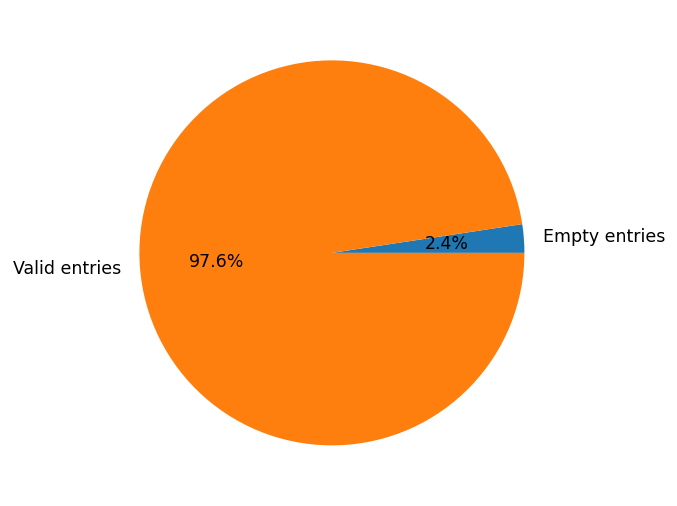

In [13]:
plt.figure(figsize=(10, 5), dpi=125)
plt.pie([total_number_of_empty_entries, (dataset_length-total_number_of_empty_entries)], labels=['Empty entries', 'Valid entries'], autopct='%1.1f%%')
plt.show()

In [14]:
print("Number of total question and answer pairs: ",dataset_length )
print("Number of total question and answer pairs without empty entries: ",dataset_length_no_empty_entries )
print("\n")
print("Number of total questions: ",number_of_questions )
print("Number of total answers: ",number_of_questions )



Number of total question and answer pairs:  33955
Number of total question and answer pairs without empty entries:  33547


Number of total questions:  33547
Number of total answers:  33547


## Number of words per question

The code block below is dedicated to severl key tasks:


1.   Text preprocessing of the questions, which involves removing punctuation, stopwords, and performing lemmatization. The processed text will be stored in the datarfame containing the questions

2.   Calcultion of various statistics related to the number of words per question such as maximum word count and length, based on the results obtained from the preprocessing step

3.   Visualization of the distribution of the number of words per question through two histograms and kernal density estimates. One histogram depicts the distribution using the rw form of the data, while the other represents the distribution after preprocessing (excluding stopwords and punctuation). These visualizations provide valuable insights into the characteristics of the dataset


In [15]:
question_df = pd.DataFrame()
question_df['question'] = file_dataframe['input']

In [16]:
# Number of words per question
question_df['length'] = question_df['question'].apply(lambda question: len(question.split(' ')))
question_df['noPunctuation'] = question_df['question'].apply(lambda question: preprocess_document(question.lower().split(),noPunctuation=True))
question_df['noStopWords'] = question_df['question'].apply(lambda question: preprocess_document(question.lower().split(),noPunctuation=True, noStopWords=True))
question_df['lemmatized'] = question_df['question'].apply(lambda question: preprocess_document(question.lower().split(),noPunctuation=True, lemmatization=True))
question_df['noStopWords-lemmatized'] = question_df['question'].apply(lambda question: preprocess_document(question.lower().split(),noPunctuation=True, lemmatization=True, noStopWords=True))

In [17]:
print("Maximum number of words per question: ", max(question_df['length']))
print("Minimum number of words per question: ", min(question_df['length']))
print("Average number of words per question: ", np.mean(question_df['length']))
print("Maximum number of words per question without punctuation and stopwords: ", max(question_df['noStopWords'].apply(lambda question: len(question))))
print("Minimum number of words per question without punctuation and stopwords: ", min(question_df['noStopWords'].apply(lambda question: len(question))))
print("Average number of words per question without punctuation and stopwords: ", np.mean(question_df['noStopWords'].apply(lambda question: len(question))))

Maximum number of words per question:  62
Minimum number of words per question:  3
Average number of words per question:  14.735803499567771
Maximum number of words per question without punctuation and stopwords:  38
Minimum number of words per question without punctuation and stopwords:  1
Average number of words per question without punctuation and stopwords:  7.6244671654693414


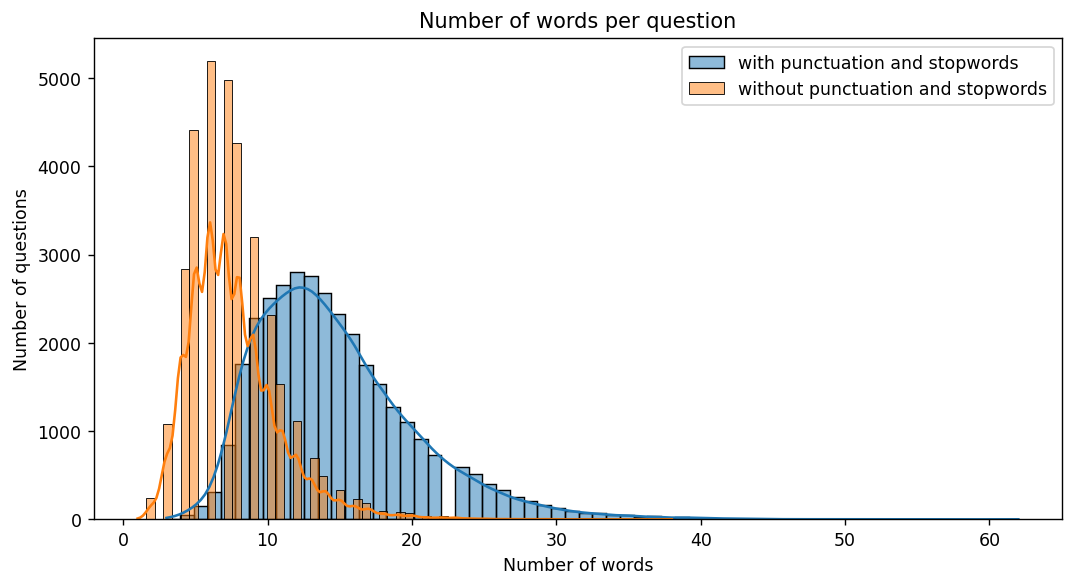

In [18]:
plt.figure(figsize=(10, 5), dpi=125)
sns.histplot(question_df['length'], bins = max(question_df['length']), kde=True, label='with punctuation and stopwords')
sns.histplot(question_df['noStopWords'].apply(lambda question: len(question)), bins=max(question_df['length']), kde=True, label='without punctuation and stopwords')
plt.xlabel('Number of words')
plt.ylabel('Number of questions')
plt.title('Number of words per question')
plt.legend(loc='upper right')
plt.show()


In [19]:
question_df

,question,length,noPunctuation,noStopWords,lemmatized,noStopWords-lemmatized
0,What is the relationship between very low Mg2+...,14,"[what, is, the, relationship, between, very, l...","[relationship, low, mg2, levels, pth, levels, ...","[what, is, the, relationship, between, very, l...","[relationship, low, mg2, level, pth, level, ca..."
1,What leads to genitourinary syndrome of menopa...,9,"[what, leads, to, genitourinary, syndrome, of,...","[leads, genitourinary, syndrome, menopause, at...","[what, lead, to, genitourinary, syndrome, of, ...","[lead, genitourinary, syndrome, menopause, atr..."
2,What does low REM sleep latency and experienci...,11,"[what, does, low, rem, sleep, latency, and, ex...","[low, rem, sleep, latency, experiencing, hallu...","[what, doe, low, rem, sleep, latency, and, exp...","[low, rem, sleep, latency, experiencing, hallu..."
3,What are some possible causes of low PTH and h...,12,"[what, are, some, possible, causes, of, low, p...","[possible, causes, low, pth, high, calcium, le...","[what, are, some, possible, cause, of, low, pt...","[possible, cause, low, pth, high, calcium, level]"
4,How does the level of anti-müllerian hormone r...,11,"[how, does, the, level, of, antimüllerian, hor...","[level, antimüllerian, hormone, relate, ovaria...","[how, doe, the, level, of, antimüllerian, horm...","[level, antimüllerian, hormone, relate, ovaria..."
...,...,...,...,...,...,...
33946,"What is Opsoclonus-Myoclonus Ataxia Syndrome, ...",16,"[what, is, opsoclonusmyoclonus, ataxia, syndro...","[opsoclonusmyoclonus, ataxia, syndrome, type, ...","[what, is, opsoclonusmyoclonus, ataxia, syndro...","[opsoclonusmyoclonus, ataxia, syndrome, type, ..."
33947,"What is Opsoclonus-Myoclonus Ataxia Syndrome, ...",16,"[what, is, opsoclonusmyoclonus, ataxia, syndro...","[opsoclonusmyoclonus, ataxia, syndrome, type, ...","[what, is, opsoclonusmyoclonus, ataxia, syndro...","[opsoclonusmyoclonus, ataxia, syndrome, type, ..."
33948,Is A part of B in a proportion of A/B?,10,"[is, a, part, of, b, in, a, proportion, of, ab]","[part, b, proportion, ab]","[is, a, part, of, b, in, a, proportion, of, ab]","[part, b, proportion, ab]"
33949,"What is the mnemonic ""Microtubules Get Constru...",20,"[what, is, the, mnemonic, microtubules, get, c...","[mnemonic, microtubules, get, constructed, poo...","[what, is, the, mnemonic, microtubule, get, co...","[mnemonic, microtubule, get, constructed, poor..."


## Number of words per answer

The subsequent code block is dedicated to the following key objectives:


1.   Conducting text preprocessing on the answers by eliminating punctuation, stopwords, and performing lemmatiazion. The processed text will be intefrated into the dataframe containing the answers

2.   Computing various statistics related to the word count per answer, including maximum, minimum, average word count and length, based on the outcomes of the preprocessing phase

3.   Visualizing the distribution of the word count per answer through two histograms and kernel density estimates. One histogram illustrates the distribution using the original form of the data, while the other showcases the distribution post-preprocessing(excluding stopwords and punctuation). These visualization serve as valuable tools for gaining insights into the dataset's underlying patterns and features


In [20]:
answers_df = pd.DataFrame()
answers_df['answer'] = file_dataframe['output']

In [21]:
# Number of words per answers
answers_df['length'] = answers_df['answer'].apply(lambda answer: len(answer.split(' ')))
answers_df['noPunctuation'] = answers_df['answer'].apply(lambda answer: preprocess_document(answer.lower().split(),noPunctuation=True))
answers_df['noStopWords'] = answers_df['answer'].apply(lambda answer: preprocess_document(answer.lower().split(),noPunctuation=True, noStopWords=True))
answers_df['lemmatized'] = answers_df['answer'].apply(lambda answer: preprocess_document(answer.lower().split(),noPunctuation=True, lemmatization=True))
answers_df['noStopWords-lemmatized'] = answers_df['answer'].apply(lambda answer: preprocess_document(answer.lower().split(),noPunctuation=True, lemmatization=True, noStopWords=True))

In [22]:
print("Maximum number of words per answer: ", max(answers_df['length']))
print("Minimum number of words per answer: ", min(answers_df['length']))
print("Average number of words per answer: ", np.mean(answers_df['length']))
print("Maximum number of words per answer without punctuation and stopwords: ", max(answers_df['noStopWords'].apply(lambda answer: len(answer))))
print("Minimum number of words per answer without punctuation and stopwords: ", min(answers_df['noStopWords'].apply(lambda answer: len(answer))))
print("Average number of words per answer without punctuation and stopwords: ", np.mean(answers_df['noStopWords'].apply(lambda answer: len(answer))))

Maximum number of words per answer:  241
Minimum number of words per answer:  1
Average number of words per answer:  54.09550779503383
Maximum number of words per answer without punctuation and stopwords:  148
Minimum number of words per answer without punctuation and stopwords:  0
Average number of words per answer without punctuation and stopwords:  31.543058991862164


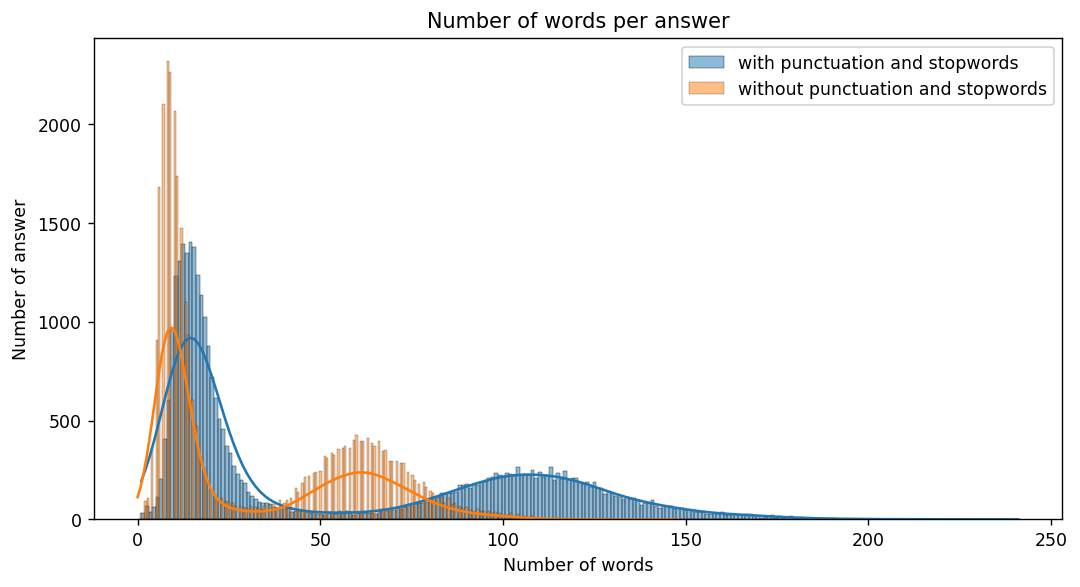

In [23]:
plt.figure(figsize=(10, 5), dpi=125)
sns.histplot(answers_df['length'], bins = max(answers_df['length']), kde=True, label='with punctuation and stopwords')
sns.histplot(answers_df['noStopWords'].apply(lambda answer: len(answer)), bins=max(answers_df['length']), kde=True, label='without punctuation and stopwords')
plt.xlabel('Number of words')
plt.ylabel('Number of answer')
plt.title('Number of words per answer')
plt.legend(loc='upper right')
plt.show()


## Vocabulary

Vocabulary analysis plays a crucial role in question answering systems for several reasons:



1.   **Understanding and Matching**:Through meticulous examination of the vocabulary, systems decipher the semantics of questions, pinpointing essential terms, phrases, and relationships. This deep comprehension facilitates precise matching with relevant answers, ensuring accurate responses to user queries.

2.  **Semantic Representation**: Vocabulary analysis enriches the semantic representation of questions and answers by identifying synonyms, related terms, and semantic parallels. This augmentation enhances the system's linguistic comprehension and retrieval capabilities.

3.  **Handling Variability**: The variability in vocabulary usage across questions necessitates adaptable mechanisms. Vocabulary analysis empowers systems to recognize diverse expressions of the same concept or intent, effectively addressing linguistic variability.

4.  **Filtering Noise**: Noise, such as stopwords and punctuation, hinders accurate comprehension of questions and answers. Vocabulary analysis effectively filters out these irrelevant elements, focusing solely on crucial content essential for comprehension and matching.

5.  **Detection of Biases**: Vocabulary analysis uncovers potential biases within the dataset, such as the over-representation of certain words or concepts. Recognizing these biases is critical as they could inadvertently influence the behavior and performance of our models.

6. **Guidance for Text Representation Methods**: Understanding the dataset's vocabulary guides the selection of appropriate text representation methods, such as word embeddings or transformers. It also assists in fine-tuning these methods to ensure optimal performance tailored to the dataset's characteristics.

In the forthcoming code block, vocabularies are extracted for both the set of questions and answers. Furthermore, vocabularies are computed individually for each question and answer, encompassing both raw and preprocessed data. Following this, histograms and kernel density estimates are plotted to showcase the distribution of word count within the vocabularies concerning the number of questions.
These visualizations proved valuable insights into the distribution patterns across the dataset's vocabularies

In [24]:
question_df['Vocabolary'] = question_df['question'].apply(lambda question: preprocess_document(question.lower().split(),isSet=True, isSorted=True))
question_df['Vocabolary-noStopWords'] = question_df['question'].apply(lambda question: preprocess_document(question.lower().split(),noPunctuation=True, noStopWords=True,isSet=True, isSorted=True))

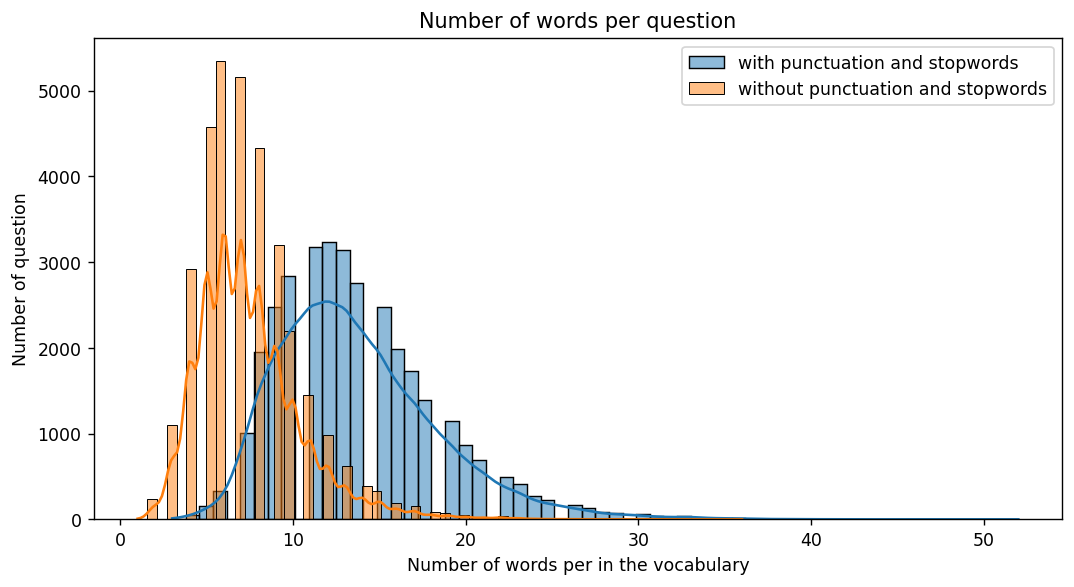

In [25]:
plt.figure(figsize=(10, 5), dpi=125)
sns.histplot(question_df['Vocabolary'].apply(lambda question: len(question)), bins = max(question_df['length']), kde=True, label='with punctuation and stopwords')
sns.histplot(question_df['Vocabolary-noStopWords'].apply(lambda question: len(question)), bins=max(question_df['length']), kde=True, label='without punctuation and stopwords')
plt.xlabel('Number of words per in the vocabulary')
plt.ylabel('Number of question')
plt.title('Number of words per question')
plt.legend(loc='upper right')
plt.show()


In [26]:
answers_df['Vocabolary'] = answers_df['answer'].apply(lambda answer: preprocess_document(answer.lower().split(),isSet=True, isSorted=True))
answers_df['Vocabolary-noStopWords'] = answers_df['answer'].apply(lambda answer: preprocess_document(answer.lower().split(),noPunctuation=True, noStopWords=True,isSet=True, isSorted=True))

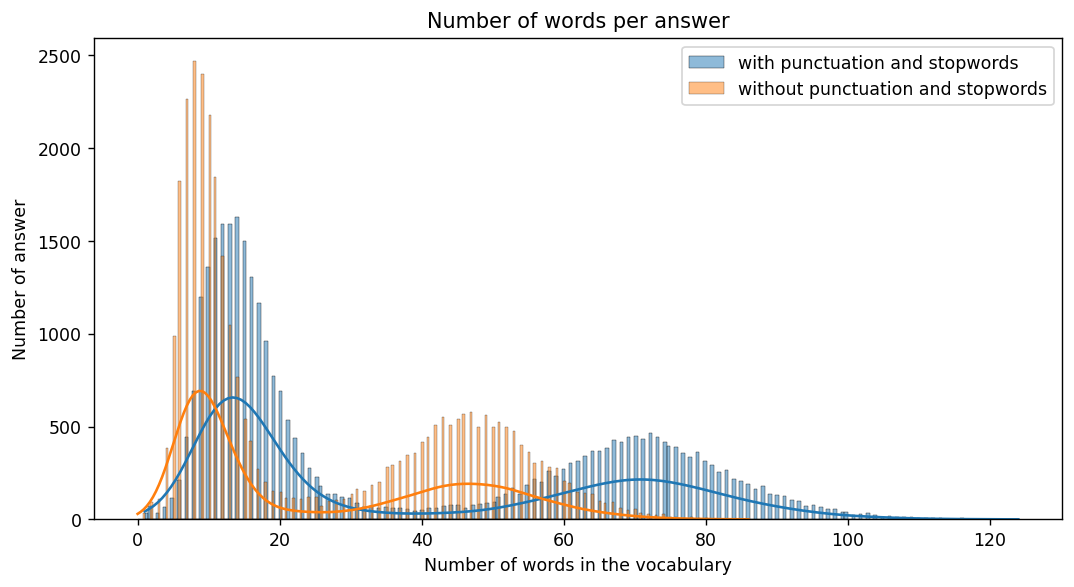

In [27]:
plt.figure(figsize=(10, 5), dpi=125)
sns.histplot(answers_df['Vocabolary'].apply(lambda answer: len(answer)), bins = max(answers_df['length']), kde=True, label='with punctuation and stopwords')
sns.histplot(answers_df['Vocabolary-noStopWords'].apply(lambda answer: len(answer)), bins=max(answers_df['length']), kde=True, label='without punctuation and stopwords')
plt.xlabel('Number of words in the vocabulary')
plt.ylabel('Number of answer')
plt.title('Number of words per answer')
plt.legend(loc='upper right')
plt.show()


In [28]:
global_questions_vocabulary = create_global_vocabolary(question_df['Vocabolary'],isSorted=True, isSet=True)
global_questions_vocabulary_noStopwords_noPunctuation = create_global_vocabolary(question_df['Vocabolary-noStopWords'],isSorted=True, isSet=True)

global_answers_vocabulary = create_global_vocabolary(answers_df['Vocabolary'],isSorted=True, isSet=True)
global_answers_vocabulary_noStopwords_noPunctuation = create_global_vocabolary(answers_df['Vocabolary-noStopWords'],isSorted=True, isSet=True)

In [29]:
print("Number of words in vocabolary of questions: ", len(global_questions_vocabulary))
print("Number of words in vocabolary of questions after removing punctuation and stopwords: ", len(global_questions_vocabulary_noStopwords_noPunctuation))
print("Number of words in vocabolary of answers: ", len(global_answers_vocabulary))
print("Number of words in vocabolary of answers after removing punctuation and stopwords: ", len(global_answers_vocabulary_noStopwords_noPunctuation))

Number of words in vocabolary of questions:  27593
Number of words in vocabolary of questions after removing punctuation and stopwords:  16987
Number of words in vocabolary of answers:  49838
Number of words in vocabolary of answers after removing punctuation and stopwords:  25931


## The Most Common 100 Words

In the upcoming code block, we showcase the 100 most common words for both the questions and the answers

In [30]:
q = nltk.Counter(create_global_vocabolary(question_df['Vocabolary-noStopWords']))
print("The most common 100 words in the vocabolary of questions: \n", q.most_common(100))
a = nltk.Counter(create_global_vocabolary(answers_df['Vocabolary-noStopWords']))
print("The most common 100 words in the vocabolary of answers: \n", a.most_common(100))

The most common 100 words in the vocabolary of questions: 
 [('type', 2992), ('associated', 2723), ('used', 1984), ('cause', 1946), ('condition', 1737), ('patients', 1628), ('treatment', 1604), ('recommended', 1495), ('syndrome', 1430), ('commonly', 1390), ('name', 1387), ('symptoms', 1382), ('patient', 1364), ('common', 1358), ('potential', 1341), ('disease', 1281), ('effect', 1265), ('typically', 1199), ('may', 1091), ('cells', 953), ('diagnosis', 920), ('risk', 866), ('typical', 820), ('characterized', 816), ('cell', 813), ('medical', 754), ('levels', 734), ('occur', 719), ('specific', 718), ('affect', 712), ('causes', 708), ('blood', 694), ('infection', 692), ('one', 661), ('responsible', 658), ('acute', 654), ('possible', 631), ('mechanism', 627), ('caused', 623), ('body', 619), ('present', 605), ('primary', 605), ('characteristic', 582), ('presents', 558), ('test', 554), ('management', 551), ('result', 540), ('individuals', 537), ('two', 534), ('types', 510), ('cancer', 505), ('i

## WordCloud

In the upcoming code block, we'll create word clouds to illustrate the most prevalent words found in both questions and the answers. Word clouds visually represent word frequency by displaying them in varying sizes: the more frequent a word appears in the text, the larger and more prominent it appears in the cloud. This visualization technique offers an intuitive insight into the mosto common words present.
Hence, word clouds are generated by analyzing the text to identify individual words, tallying their occurences, and then graphically rendering them with larger sizes attributed to more frequent words

### WordCloud for words in questions

In [31]:
all_questions = ' '.join(question_df['question'])
all_questions_noPunctuation = preprocess_document(all_questions.lower().split(), noPunctuation=True)
all_questions_noStopWords = preprocess_document(all_questions_noPunctuation, noStopWords=True)

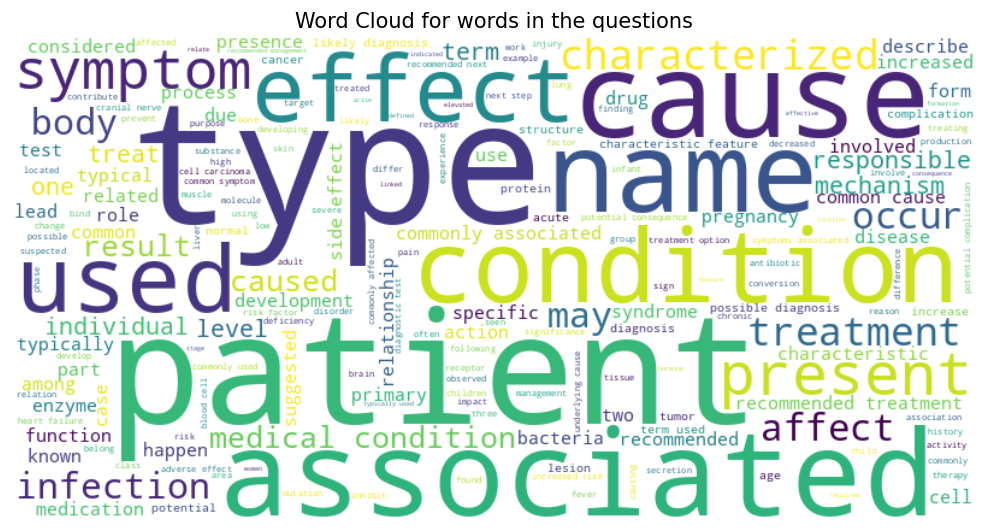

In [32]:
# Create a WordCloud object
text = ' '.join(all_questions_noPunctuation)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
# Plot the word cloud
plt.figure(figsize=(10, 5), dpi=125)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for words in the questions')
plt.show()

### WordCloud for words in questions after removing stopwords

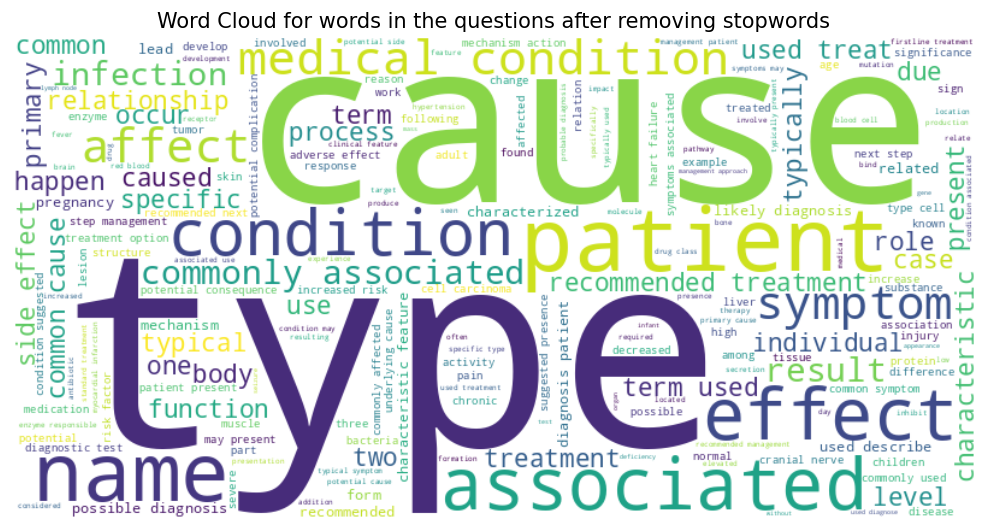

In [33]:
# Create a WordCloud object
text = ' '.join(all_questions_noStopWords)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
# Plot the word cloud
plt.figure(figsize=(10, 5), dpi=125)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for words in the questions after removing stopwords')
plt.show()

### WordCloud for words in answers

In [34]:
all_answers = ' '.join(answers_df['answer'])
all_answers_noPunctuation = preprocess_document(all_answers.lower().split(), noPunctuation=True)
all_answers_noStopWords = preprocess_document(all_answers_noPunctuation, noStopWords=True)

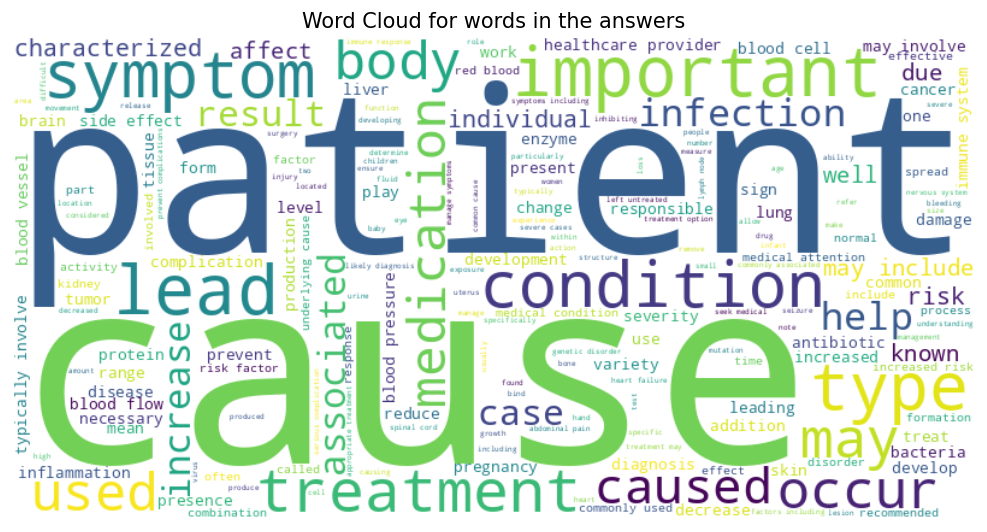

In [35]:
# Create a WordCloud object
text = ' '.join(all_answers_noPunctuation)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
# Plot the word cloud
plt.figure(figsize=(10, 5), dpi=125)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for words in the answers')
plt.show()

### WordCloud for words in answers after removing stopwords

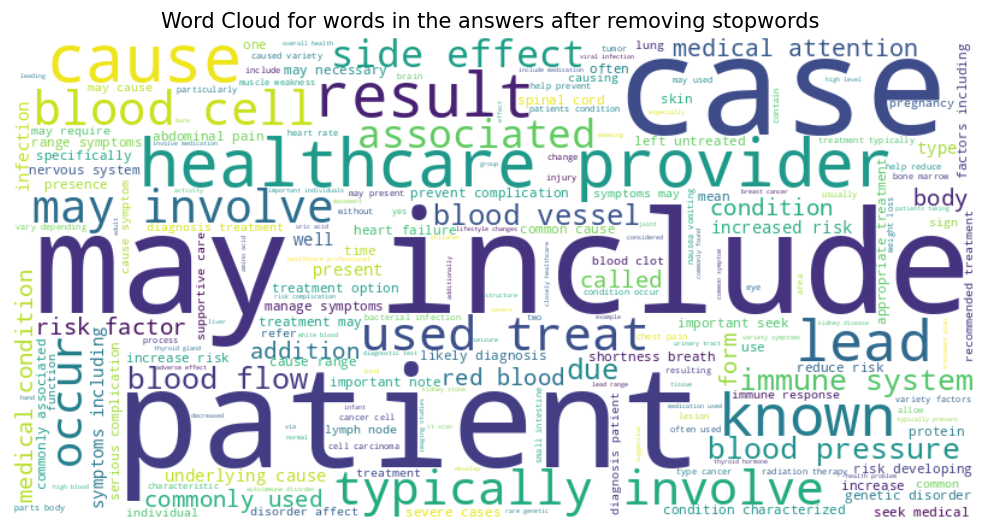

In [36]:
text = ' '.join(all_answers_noStopWords)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
# Plot the word cloud
plt.figure(figsize=(10, 5), dpi=125)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for words in the answers after removing stopwords ')
plt.show()

## N-grams

N-grams are contiguos sequences of 'n' items (typically words) from a given text. For example, in a text, bigrams (2-grams) would be sequences of two words and trigrams (3-grams) would be sequences of three words. Analyzing n-grams is important because:


1.   **Contextual Insight**: They help in understanding the context and relationships between words in the text

2.   **Pattern Identification**: Common n-grams can reveal frequently occuring phrases and structures, which are useful for languafe modelling and improving text generation

3.   **Noise Reduction**: They assist in filtering out noise by focusing on meaningful word combinations rather than isolated words.




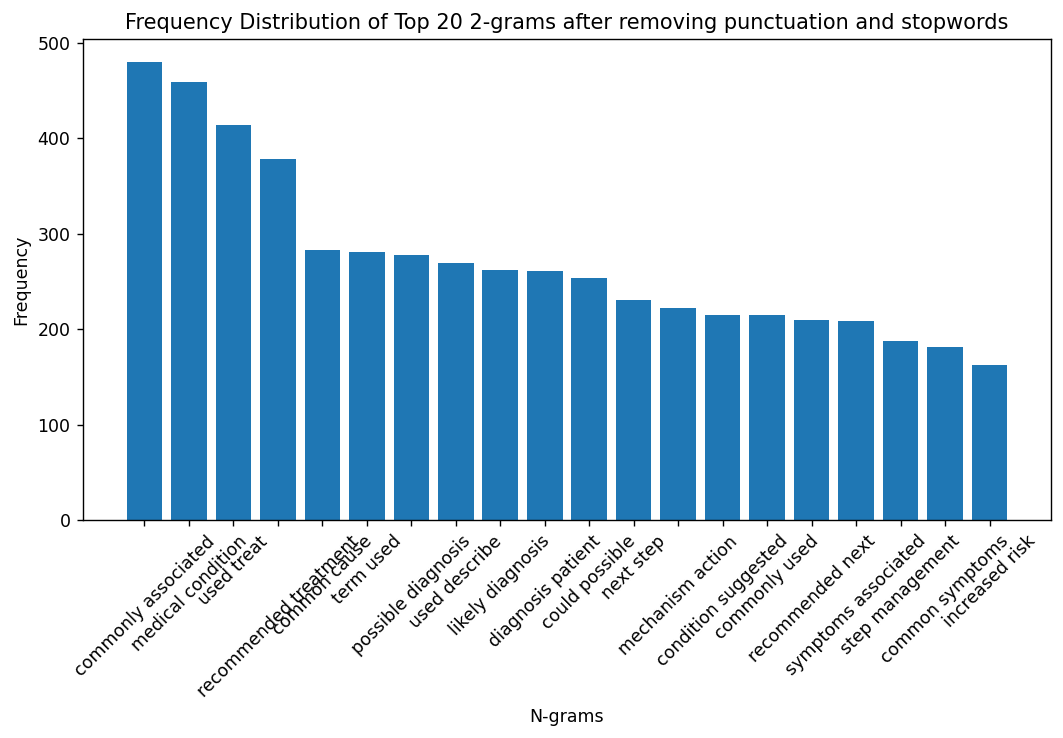

In [37]:
nGrams(document=all_questions_noStopWords, size=2, NmostCommon=20)

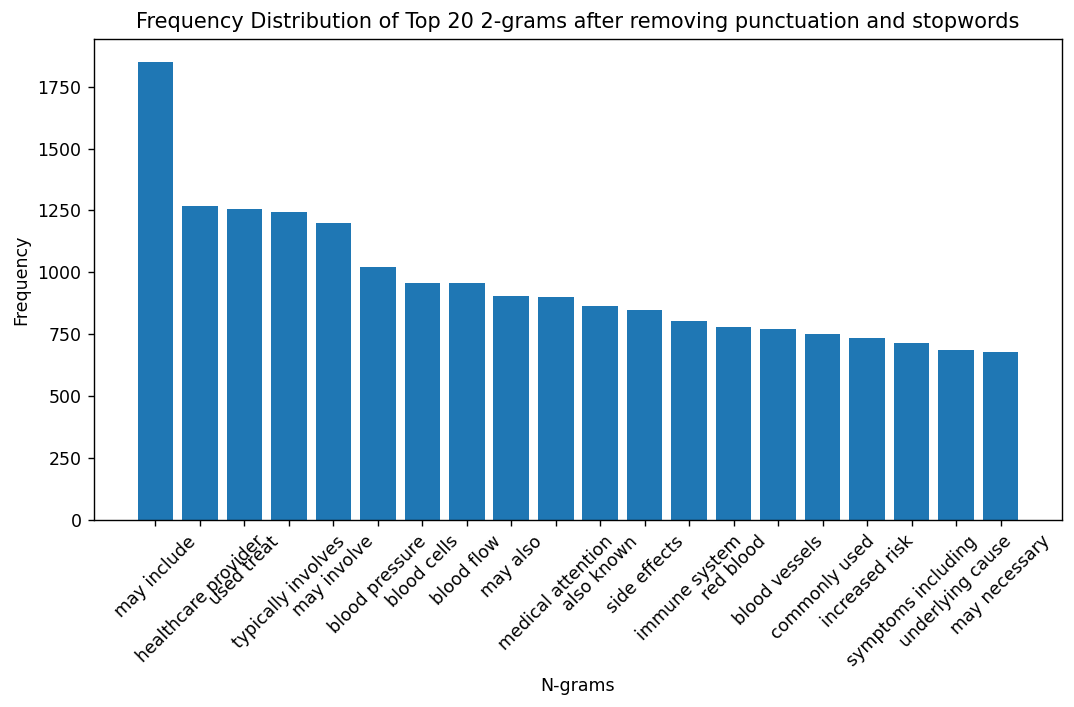

In [38]:
nGrams(document=all_answers_noStopWords, size=2, NmostCommon=20)

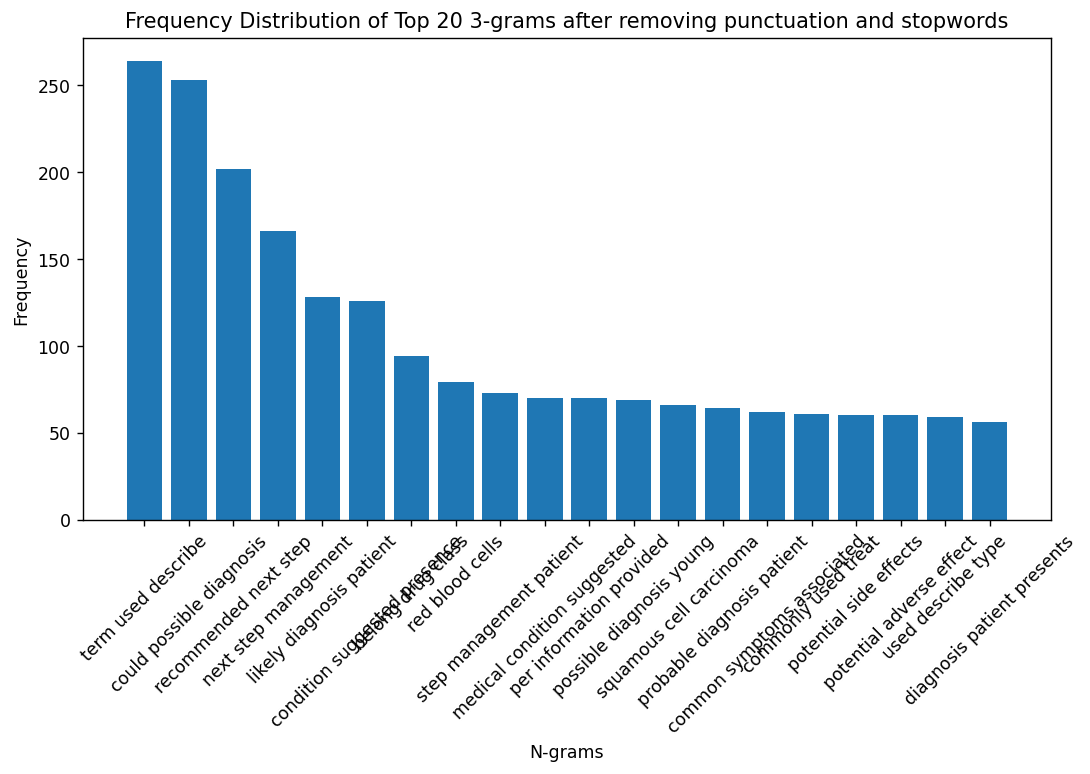

In [39]:
nGrams(document=all_questions_noStopWords, size=3, NmostCommon=20)

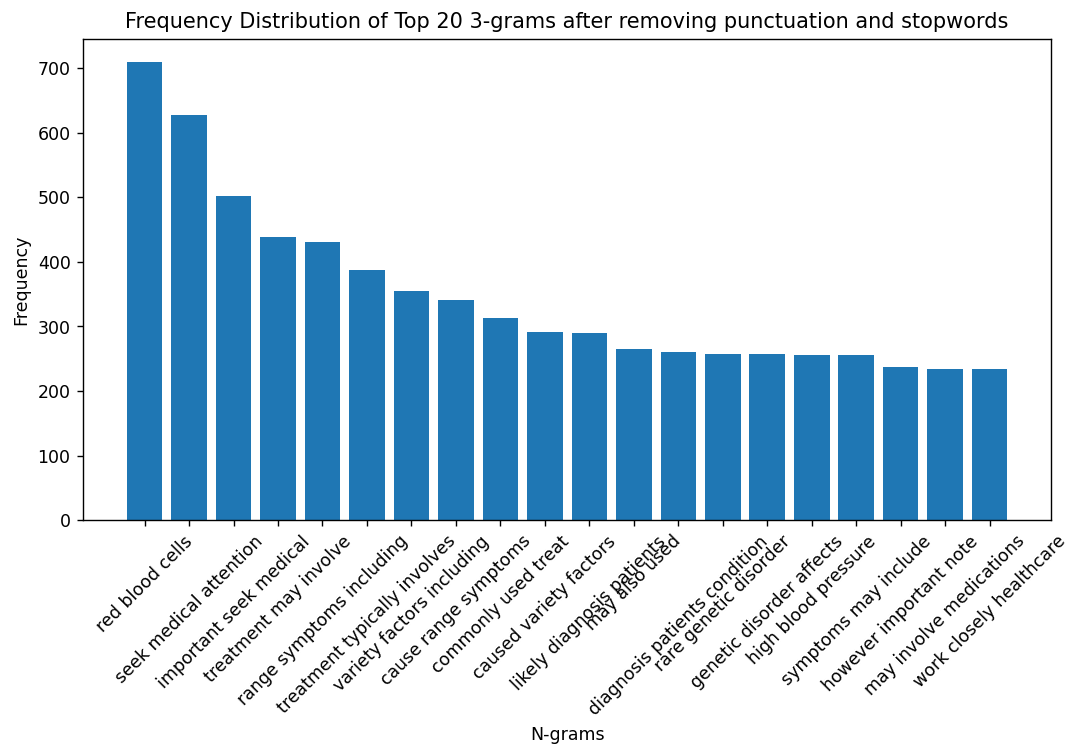

In [40]:
nGrams(document=all_answers_noStopWords, size=3, NmostCommon=20)

# Save dataset

This code snippet saves the current state of various dataframes to CSV files if the SAVE_DATASET flag is set to True. Each dataframe is saved without the index to keep the files clean and focused on the data.

In [ ]:
if SAVE_DATASET:
  file_dataframe.to_csv('pre_preprocessed_dataset.csv', index=False)
  question_df.to_csv('questions_dataframe.csv', index=False)
  answers_df.to_csv('answers_dataframe.csv', index=False)